# Chicago Taxi Trips: Setup
- In this file we will set up our data taken from Google BigQuery, discover initial trends, and wrangle it with weather data before doing our full EDA

In [1]:
# Read in required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read in data files and combine them

- Data was first queried on Google BigQuery

In [3]:
#2021 Data
df_2021 = pd.read_csv("C://Users//JCCLI//Downloads//ChicagoTaxiTrips2021.csv", usecols = ('unique_key','trip_miles'\
                                                                                         ,'payment_type','company'\
                                                                                         ,'pickup_latitude','pickup_longitude'\
                                                                                         ,'dropoff_latitude','dropoff_longitude'\
                                                                                         ,'fare_dollars','trip_start_dt','trip_end_dt'\
                                                                                         ,'year','month','day','hour','weekday','cost_per_mile'\
                                                                                         ,'cost_per_minute','dropoff_area','pick_up_area','mph'))

In [4]:
# 1st half of 2022 Data
df_2022_P1 = pd.read_csv("C://Users//JCCLI//Downloads//ChicagoTaxiTrips2022P1.csv",usecols=('unique_key','trip_miles'\
                                                                                ,'payment_type','company'\
                                                                                ,'pickup_latitude','pickup_longitude'\
                                                                                ,'dropoff_latitude','dropoff_longitude'\
                                                                                ,'fare_dollars','trip_start_dt'\
                                                                                ,'trip_end_dt','year','month','day','hour'\
                                                                                ,'weekday','cost_per_mile'\
                                                                                ,'cost_per_minute','dropoff_area'\
                                                                                ,'pick_up_area','mph'))

In [5]:
# 2nd half of 2022 Data through 12/5
df_2022_P2 = pd.read_csv("C://Users//JCCLI//Downloads//ChicagoTaxiTrips2022P2.csv",usecols=('unique_key','trip_miles'\
                                                                            ,'payment_type','company','pickup_latitude'\
                                                                            ,'pickup_longitude','dropoff_latitude'\
                                                                            ,'dropoff_longitude','fare_dollars'\
                                                                            ,'trip_start_dt','trip_end_dt','year','month'\
                                                                            ,'day','hour','weekday','cost_per_mile'\
                                                                            ,'cost_per_minute','dropoff_area'\
                                                                            ,'pick_up_area','mph'))

In [7]:
# December 2022 Data
df_2022_end = pd.read_csv("C://Users//JCCLI//Downloads//Chicago_Taxi_Trips_2022E.csv",usecols=('unique_key','trip_miles'\
                                                                             ,'payment_type','company','pickup_latitude'\
                                                                             ,'pickup_longitude','dropoff_latitude'\
                                                                             ,'dropoff_longitude','fare_dollars'\
                                                                             ,'trip_start_dt','trip_end_dt','year','month'\
                                                                             ,'day','hour','weekday'\
                                                                             ,'cost_per_minute','dropoff_area'\
                                                                             ,'pick_up_area','mph'))

In [8]:
# For modeling file
df= pd.concat([df_2022_P1,df_2022_P2,df_2022_end],ignore_index=True)

In [8]:
# Stack all datasets together
# For EDA
df_stack = pd.concat([df_2021,df_2022_P1,df_2022_P2,df_2022_end],ignore_index=True)

In [9]:
df_stack.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7017873 entries, 0 to 7017872
Data columns (total 21 columns):
 #   Column             Dtype  
---  ------             -----  
 0   unique_key         object 
 1   trip_miles         float64
 2   payment_type       object 
 3   company            object 
 4   pickup_latitude    float64
 5   pickup_longitude   float64
 6   dropoff_latitude   float64
 7   dropoff_longitude  float64
 8   fare_dollars       float64
 9   trip_start_dt      object 
 10  trip_end_dt        object 
 11  year               int64  
 12  month              int64  
 13  day                int64  
 14  hour               int64  
 15  weekday            object 
 16  dropoff_area       object 
 17  cost_per_mile      float64
 18  cost_per_minute    float64
 19  pick_up_area       object 
 20  mph                float64
dtypes: float64(9), int64(4), object(8)
memory usage: 1.1+ GB


In [10]:
df_duration = pd.read_csv("C://Users//JCCLI//Downloads//Chicago_Taxi_Trips_Durations_EDA.csv")

In [11]:
df = pd.merge(df_stack,df_duration, on=['unique_key','year','month','day','hour','weekday'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7017858 entries, 0 to 7017857
Data columns (total 22 columns):
 #   Column             Dtype  
---  ------             -----  
 0   unique_key         object 
 1   trip_miles         float64
 2   payment_type       object 
 3   company            object 
 4   pickup_latitude    float64
 5   pickup_longitude   float64
 6   dropoff_latitude   float64
 7   dropoff_longitude  float64
 8   fare_dollars       float64
 9   trip_start_dt      object 
 10  trip_end_dt        object 
 11  year               int64  
 12  month              int64  
 13  day                int64  
 14  hour               int64  
 15  weekday            object 
 16  dropoff_area       object 
 17  cost_per_mile      float64
 18  cost_per_minute    float64
 19  pick_up_area       object 
 20  mph                float64
 21  trip_seconds       float64
dtypes: float64(10), int64(4), object(8)
memory usage: 1.2+ GB


In [14]:
# Drop trip minutes and unique key variables to free up memory
df = df.drop(['unique_key'],axis=1)

In [21]:
df=df.drop(['trip_minutes'],axis=1)

In [16]:
df['trip_minutes'] = df['trip_seconds']/60

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7017858 entries, 0 to 7017857
Data columns (total 22 columns):
 #   Column             Dtype  
---  ------             -----  
 0   trip_miles         float64
 1   payment_type       object 
 2   company            object 
 3   pickup_latitude    float64
 4   pickup_longitude   float64
 5   dropoff_latitude   float64
 6   dropoff_longitude  float64
 7   fare_dollars       float64
 8   trip_start_dt      object 
 9   trip_end_dt        object 
 10  year               int64  
 11  month              int64  
 12  day                int64  
 13  hour               int64  
 14  weekday            object 
 15  dropoff_area       object 
 16  cost_per_mile      float64
 17  cost_per_minute    float64
 18  pick_up_area       object 
 19  mph                float64
 20  trip_seconds       float64
 21  trip_minutes       float64
dtypes: float64(11), int64(4), object(7)
memory usage: 1.2+ GB


**Check distributional trends**

In [23]:
# Check distributions of continuous variables
df_quant = df[['trip_miles','trip_minutes','fare_dollars','cost_per_minute','cost_per_mile',\
              'mph','tolls','tips']]

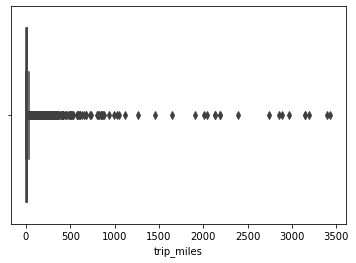

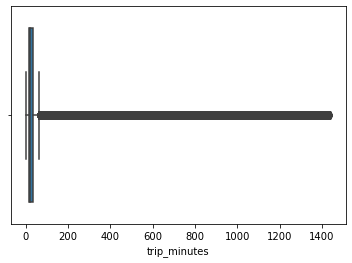

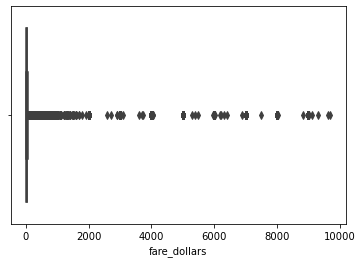

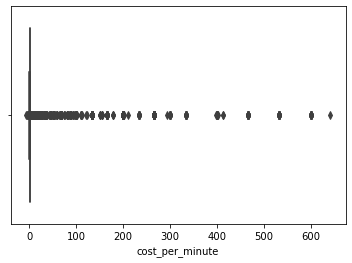

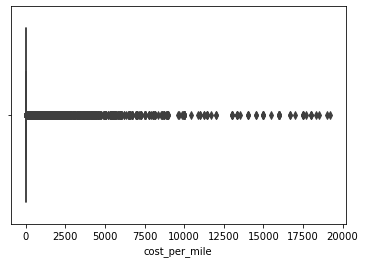

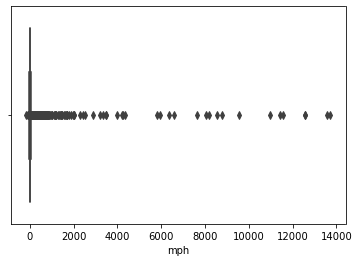

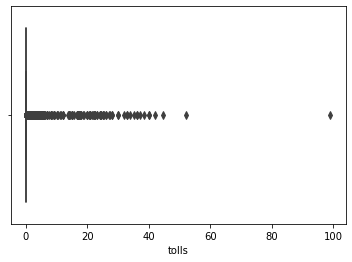

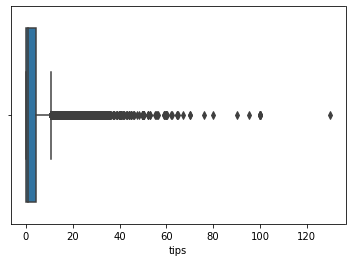

In [24]:
col = list(df_quant.columns)
for i in range(8):
    pl = sns.boxplot(data=df_quant,x=col[i])
    plt.xlabel(col[i])
    plt.show()

Looking at the distributions of current quantitative variables, there is obviously some cleaning we need to do with many of the variables. It makes total sense to filter out the outliers for most of these variables as they are probably scientifically impossible to get such as a mph greater than 90 or trip minutes that are negative along with fare being more than $200. These most likely represent measurement errors or noise in the data that was collected and should be removed prior to modeling because we don't want to make our model make scientifically impossible or insane predictions.

**Outlier Removal**

To remove our outliers, we should first check and see how much of the total data our outliers for each variable take up so we can determine if it is safe to do so without getting rid of too much of the data.


In [25]:
Q1 = df_quant.quantile(0.25)
Q3 = df_quant.quantile(0.75)
IQR=Q3-Q1
((df_quant < (Q1 - 1.5 * IQR)) | (df_quant > (Q3 + 1.5 * IQR))).sum()/7017858

trip_miles         0.007248
trip_minutes       0.028934
fare_dollars       0.007136
cost_per_minute    0.036586
cost_per_mile      0.096668
mph                0.026975
tolls              0.000167
tips               0.002268
dtype: float64

In [18]:
# We will mostly only clean out the values of columns we will want to use in the model such as trip miles, trip minutes,
#fare dollars, and mph. Tips and tolls will not be considered in model along with mph but will clean it out
df_cleaned = df[(df.fare_dollars < 150)\
                & (df.trip_minutes>0) & (df.trip_minutes < 90) & (df.mph < 100) & (df.trip_miles < 60)
               ]

In [20]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6977387 entries, 0 to 7017857
Data columns (total 22 columns):
 #   Column             Dtype  
---  ------             -----  
 0   trip_miles         float64
 1   payment_type       object 
 2   company            object 
 3   pickup_latitude    float64
 4   pickup_longitude   float64
 5   dropoff_latitude   float64
 6   dropoff_longitude  float64
 7   fare_dollars       float64
 8   trip_start_dt      object 
 9   trip_end_dt        object 
 10  year               int64  
 11  month              int64  
 12  day                int64  
 13  hour               int64  
 14  weekday            object 
 15  dropoff_area       object 
 16  cost_per_mile      float64
 17  cost_per_minute    float64
 18  pick_up_area       object 
 19  mph                float64
 20  trip_seconds       float64
 21  trip_minutes       float64
dtypes: float64(11), int64(4), object(7)
memory usage: 1.2+ GB


In [19]:
df_cleaned.to_csv('C://Users//JCCLI//Downloads//Chicago_Taxi_Cleaned.csv',index=False,header=True)

<AxesSubplot:xlabel='trip_miles'>

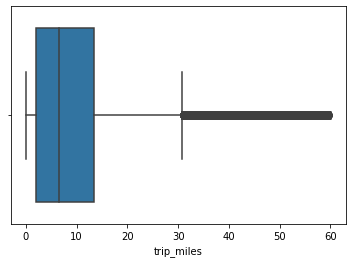

In [29]:
sns.boxplot(x='trip_miles',data=df_cleaned)

### Chicago Weather Data 
- One factor that could impact fare rate would be weather since maybe certain weather could cause taxi demand to change thus reducing traffic or other available cabs
- We will import Chicago hourly weather data taken from 2021-2022 for our analysis
- Note that when starting this project the data from the end of December 2022 was not stored in BigQuery yet, so later the data was added together with the previous

In [21]:
# Original Data
weather_df = pd.read_csv('C://Users//JCCLI//Downloads//WeatherDataChicagoHourly.csv')

In [22]:
# Data From December 2022
weather_df_end = pd.read_csv('C://Users//JCCLI//Downloads//WeatherDataChicagoHourlyend.csv')

In [23]:
weather_df_full = pd.concat([weather_df,weather_df_end],ignore_index=True)

In [24]:
weather_df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17424 entries, 0 to 17423
Data columns (total 10 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   timestamp                                    17424 non-null  object 
 1   Basel Temperature [2 m elevation corrected]  17424 non-null  float64
 2   Basel Precipitation Total                    17424 non-null  float64
 3   Basel Snowfall Amount                        17424 non-null  float64
 4   Basel Snow Depth                             16800 non-null  float64
 5   Basel Wind Gust                              17424 non-null  float64
 6   Basel Wind Speed [10 m]                      17424 non-null  float64
 7   Basel Wind Direction [10 m]                  17424 non-null  float64
 8   Basel Wind Speed [100 m]                     16800 non-null  float64
 9   Basel Wind Direction [100 m]                 16800 non-null  float64
dty

In [25]:
# Change timestamp to datetime
weather_df_full['timestamp'] = pd.to_datetime(weather_df_full['timestamp'])

In [26]:
# Rename initial columns
weather_df_full = weather_df_full.rename(columns={'timestamp': 'Date', 'Basel Temperature [2 m elevation corrected]':'Temperature',\
                                       'Basel Precipitation Total':'Total Precipitation', 'Basel Snowfall Amount':'Snow Amount', 'Basel Wind Gust':'Wind Gust', \
                                       'Basel Wind Speed [10 m]':'Wind Speed [10 m]'})

In [27]:
# Convert Wind Gust to MPH
weather_df_full['Wind_Gust'] = weather_df_full['Wind Gust'] * 0.6213

#Convert Snow Amount to inches
weather_df_full['Snow_Amount_in'] = weather_df_full['Snow Amount'] * 0.393701

#Convert Wind Speed to MPH
weather_df_full['Wind_Speed [10 m]'] = weather_df_full['Wind Speed [10 m]'] * 0.6213
weather_df_full['Wind Speed [100 m]'] = weather_df_full['Basel Wind Speed [100 m]'] * 0.6213

In [28]:
# Drop non-converted variables
weather_df_full = weather_df_full.drop(['Snow Amount', 'Basel Snow Depth', 'Wind Gust', 'Wind Speed [10 m]', 'Basel Wind Direction [10 m]', 'Basel Wind Speed [100 m]', 'Basel Wind Direction [100 m]'], axis = 1)

In [29]:
# Create hour, day, and month variables
weather_df_full=weather_df_full.assign(hour=pd.to_datetime(weather_df_full['Date']).dt.strftime("%H"),\
                             day=pd.to_datetime(weather_df_full['Date']).dt.strftime("%d"), \
                             month=pd.to_datetime(weather_df_full['Date']).dt.strftime('%m'),year=pd.to_datetime(weather_df_full['Date']).dt.strftime('%Y'))

In [20]:
weather_df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17424 entries, 0 to 17423
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 17424 non-null  datetime64[ns]
 1   Temperature          17424 non-null  float64       
 2   Total Precipitation  17424 non-null  float64       
 3   Wind_Gust            17424 non-null  float64       
 4   Snow_Amount_in       17424 non-null  float64       
 5   Wind_Speed [10 m]    17424 non-null  float64       
 6   Wind Speed [100 m]   16800 non-null  float64       
 7   hour                 17424 non-null  object        
 8   day                  17424 non-null  object        
 9   month                17424 non-null  object        
 10  year                 17424 non-null  object        
dtypes: datetime64[ns](1), float64(6), object(4)
memory usage: 1.5+ MB


In [30]:
# Set variables as integers
weather_df_full['hour'] = weather_df_full['hour'].astype("int64")
weather_df_full['day'] = weather_df_full['day'].astype("int64")
weather_df_full['month'] = weather_df_full['month'].astype("int64")
weather_df_full['year'] = weather_df_full['year'].astype("int64")

In [31]:
# Inner join on year, month, day, and hour
df_final_model = pd.merge(df_cleaned,weather_df_full,on=['year','month','day','hour'])

In [39]:
# validate results of join
df_final_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6702136 entries, 0 to 6702135
Data columns (total 47 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   unique_key                    object        
 1   trip_start_timestamp          object        
 2   trip_end_timestamp            object        
 3   trip_miles                    float64       
 4   pickup_census_tract           float64       
 5   dropoff_census_tract          float64       
 6   pickup_community_area         float64       
 7   dropoff_community_area        float64       
 8   payment_type                  object        
 9   company                       object        
 10  pickup_latitude               float64       
 11  pickup_longitude              float64       
 12  dropoff_latitude              float64       
 13  dropoff_longitude             float64       
 14  fare_dollars                  float64       
 15  trip_start_dt                 ob

In [30]:
df_final_model = df_final_model.drop(['Snow Amount', 'Basel Snow Depth', 'Wind Gust', 'Wind Speed [10 m]', 'Basel Wind Direction [10 m]', 'Basel Wind Speed [100 m]', 'Basel Wind Direction [100 m]'], axis = 1)

In [32]:
# Save joined dataset to csv
df_final_model.to_csv('C://Users//JCCLI//Downloads//Chicago_Taxi_EDA.csv',index=False,header=True)